In [1]:
## Importing all the important libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objs as go
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

In [2]:
df = pd.read_csv(r'C:\Users\SWAPNIL BISWAS\DATASETS\heart_new.csv')

In [3]:
print(df)

       age     sex chest pain type  ... oldpeak  ST slope  target
0     40.0    Male             ata  ...     0.0        Up     0.0
1     49.0  Female             nap  ...     1.0      Flat     1.0
2     37.0    Male             ata  ...     0.0        Up     0.0
3     48.0  Female             asy  ...     1.5      Flat     1.0
4     54.0    Male             nap  ...     0.0        Up     0.0
...    ...     ...             ...  ...     ...       ...     ...
1185  45.0    Male              ta  ...     1.2      Flat     1.0
1186  68.0    Male             asy  ...     3.4      Flat     1.0
1187  57.0    Male             asy  ...     1.2      Flat     1.0
1188  57.0  Female             ata  ...     0.0      Flat     1.0
1189  38.0    Male             nap  ...     0.0        Up     0.0

[1190 rows x 12 columns]


In [4]:
df.shape

## We have 1190 rows and 12 columns

(1190, 12)

In [5]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40.0,Male,ata,140,289.0,0.0,normal,172.0,N,0.0,Up,0.0
1,49.0,Female,nap,160,180.0,0.0,normal,156.0,N,1.0,Flat,1.0
2,37.0,Male,ata,130,283.0,0.0,LVH,98.0,N,0.0,Up,0.0
3,48.0,Female,asy,138,214.0,0.0,normal,108.0,Y,1.5,Flat,1.0
4,54.0,Male,nap,150,195.0,0.0,normal,122.0,N,0.0,Up,0.0


In [6]:
## Printing the information about our datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1188 non-null   float64
 1   sex                  1188 non-null   object 
 2   chest pain type      1188 non-null   object 
 3   resting bp s         1188 non-null   object 
 4   cholesterol          1188 non-null   float64
 5   fasting blood sugar  1188 non-null   float64
 6   resting ecg          1188 non-null   object 
 7   max heart rate       1188 non-null   float64
 8   exercise angina      1188 non-null   object 
 9   oldpeak              1188 non-null   float64
 10  ST slope             1188 non-null   object 
 11  target               1188 non-null   float64
dtypes: float64(6), object(6)
memory usage: 111.7+ KB


In [7]:
df.isnull().sum()

## WE CAN SEE THERE ARE NO MISSING VALUES

age                    2
sex                    2
chest pain type        2
resting bp s           2
cholesterol            2
fasting blood sugar    2
resting ecg            2
max heart rate         2
exercise angina        2
oldpeak                2
ST slope               2
target                 2
dtype: int64

In [8]:
#printing the columbns of the dataset
print(df.columns)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [9]:
##Renaming the variables of the specific columns
print(df.rename(columns = {'chest pain type' : 'chestpaintype'}))

       age     sex chestpaintype  ... oldpeak  ST slope  target
0     40.0    Male           ata  ...     0.0        Up     0.0
1     49.0  Female           nap  ...     1.0      Flat     1.0
2     37.0    Male           ata  ...     0.0        Up     0.0
3     48.0  Female           asy  ...     1.5      Flat     1.0
4     54.0    Male           nap  ...     0.0        Up     0.0
...    ...     ...           ...  ...     ...       ...     ...
1185  45.0    Male            ta  ...     1.2      Flat     1.0
1186  68.0    Male           asy  ...     3.4      Flat     1.0
1187  57.0    Male           asy  ...     1.2      Flat     1.0
1188  57.0  Female           ata  ...     0.0      Flat     1.0
1189  38.0    Male           nap  ...     0.0        Up     0.0

[1190 rows x 12 columns]


In [10]:
print(df)

       age     sex chest pain type  ... oldpeak  ST slope  target
0     40.0    Male             ata  ...     0.0        Up     0.0
1     49.0  Female             nap  ...     1.0      Flat     1.0
2     37.0    Male             ata  ...     0.0        Up     0.0
3     48.0  Female             asy  ...     1.5      Flat     1.0
4     54.0    Male             nap  ...     0.0        Up     0.0
...    ...     ...             ...  ...     ...       ...     ...
1185  45.0    Male              ta  ...     1.2      Flat     1.0
1186  68.0    Male             asy  ...     3.4      Flat     1.0
1187  57.0    Male             asy  ...     1.2      Flat     1.0
1188  57.0  Female             ata  ...     0.0      Flat     1.0
1189  38.0    Male             nap  ...     0.0        Up     0.0

[1190 rows x 12 columns]


In [11]:
## printing the information about our datasets

df.info()

atts = []
print(f"\n{'Attribute':>14} | 'of unique value(n)'  | Unique values(if n<5)")
print('---------------|-----------------------|-----------------')
for att in df.columns:
    print(f'{att:>14} | {df[att].nunique():>21} | ', 
          f' {list(df[att].unique())}' if df[att].nunique()<5 else "-",
         )
    if(df[att].nunique() < 5): # define category attribute as attribute that have unique values < 5
        atts.append(att)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1188 non-null   float64
 1   sex                  1188 non-null   object 
 2   chest pain type      1188 non-null   object 
 3   resting bp s         1188 non-null   object 
 4   cholesterol          1188 non-null   float64
 5   fasting blood sugar  1188 non-null   float64
 6   resting ecg          1188 non-null   object 
 7   max heart rate       1188 non-null   float64
 8   exercise angina      1188 non-null   object 
 9   oldpeak              1188 non-null   float64
 10  ST slope             1188 non-null   object 
 11  target               1188 non-null   float64
dtypes: float64(6), object(6)
memory usage: 111.7+ KB

     Attribute | 'of unique value(n)'  | Unique values(if n<5)
---------------|-----------------------|-----------------
           age | 

In [12]:
## describing the dataset

df.describe()

,age,cholesterol,fasting blood sugar,max heart rate,oldpeak,target
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,53.708754,210.371212,0.212121,139.726431,0.921717,0.527778
std,9.356878,101.499936,0.408982,25.534292,1.085083,0.499438
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,188.000000,0.000000,121.000000,0.000000,0.000000
50%,54.000000,229.000000,0.000000,140.500000,0.600000,1.000000
75%,60.000000,270.000000,0.000000,160.000000,1.600000,1.000000
max,77.000000,603.000000,1.000000,202.000000,6.200000,1.000000


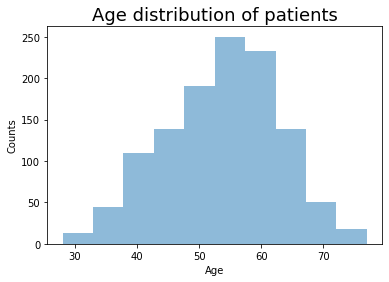

In [13]:
# Age :

plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age distribution of patients" , size = 18)
plt.hist(df['age'] ,  alpha=0.5)
plt.show()

## we can the see that age seems to be normally distributed

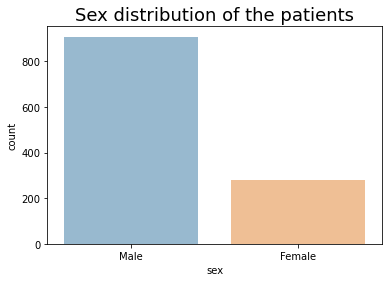

In [14]:
## SEX:
plt.title("Sex distribution of the patients" , size = 18)
sns.countplot(df["sex"] , alpha = 0.5)

## There are more number of males than females

(array([172.,   6.,  88., 428., 350., 117.,  18.,   3.,   3.,   3.]),
 array([  0. ,  60.3, 120.6, 180.9, 241.2, 301.5, 361.8, 422.1, 482.4,
        542.7, 603. ]),
 <a list of 10 Patch objects>)

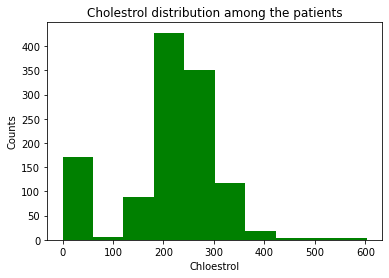

In [15]:
# Chlorestrol
plt.title("Cholestrol distribution among the patients")
plt.xlabel("Chloestrol")
plt.ylabel("Counts")
plt.hist(df['cholesterol'] , alpha = 1 , color = 'green')

In [16]:
## getting the frequency values of the cholestrol patients
df['cholesterol'].value_counts()

0.0      172
254.0     16
234.0     13
204.0     13
211.0     13
        ... 
466.0      1
113.0      1
388.0      1
337.0      1
365.0      1
Name: cholesterol, Length: 222, dtype: int64

Text(0.5, 1.0, 'Distribution of Cholestrol values')

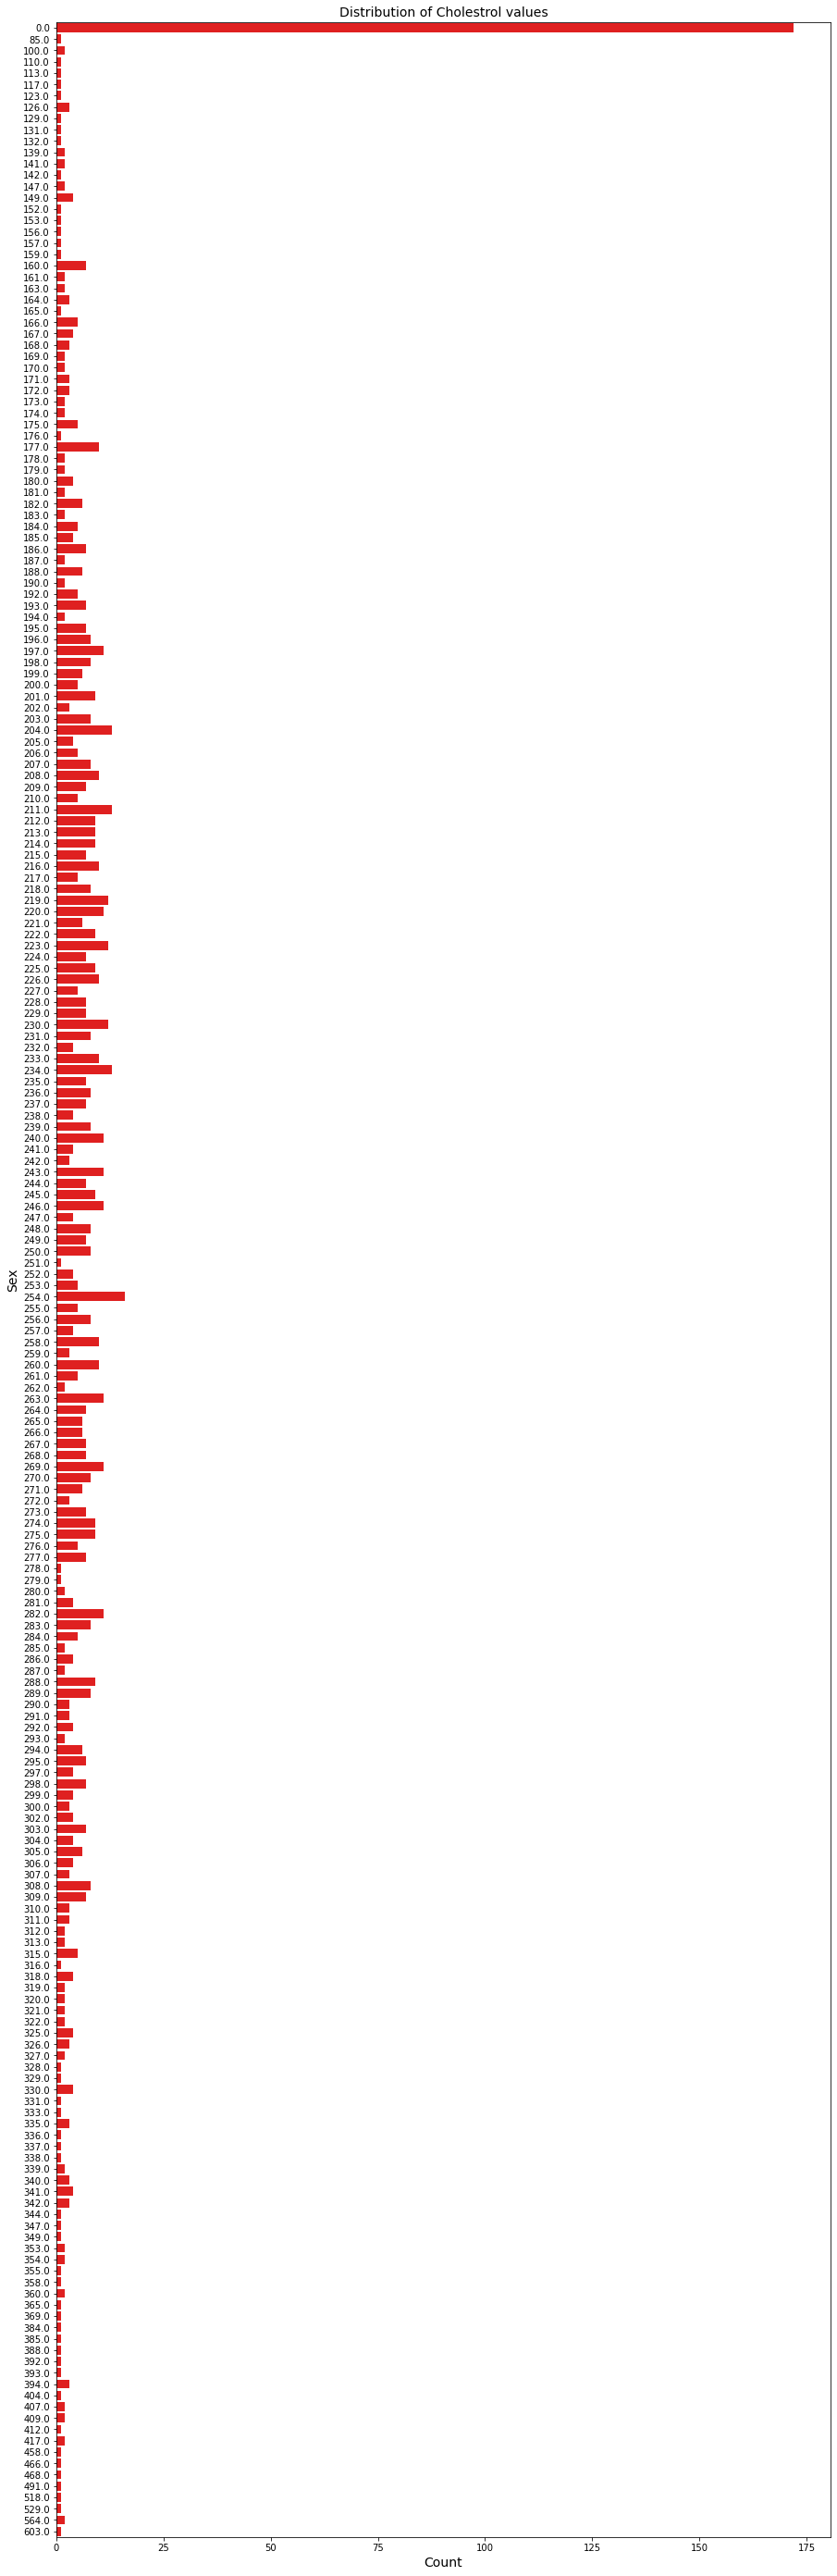

In [17]:
plt.figure(figsize=[15,50]);
sns.countplot(data = df , y = 'cholesterol' , color = 'red')
plt.xlabel('Count' , size = 14)
plt.ylabel('Sex' , size = 14)
plt.title("Distribution of Cholestrol values" , size = 14)

## there is a long peak at 0 "172 patients with 0 value for Cholestrol test", we will drop them just in this visualisation only to look at another values

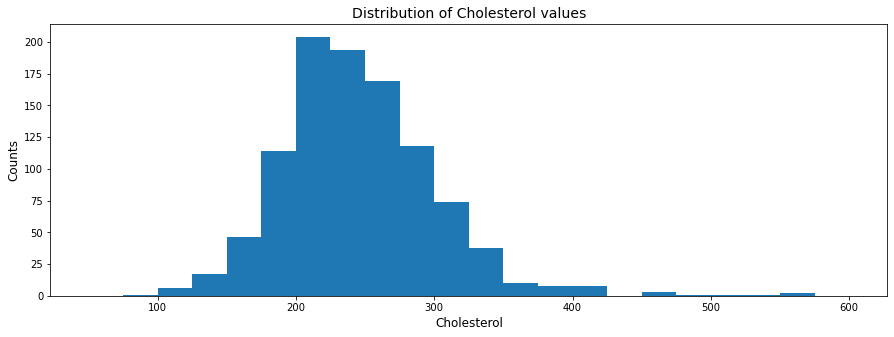

In [18]:
# creat a new data fram in which the values of "Cholesterol" column not equal to "0"

plt.figure(figsize=[15,5]);
bins = np.arange(50,620,25)
color = sns.color_palette()[0]
plt.hist(data = df, x = "cholesterol", color = color, bins = bins);
plt.xlabel("Cholesterol", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Distribution of Cholesterol values", size = 14);

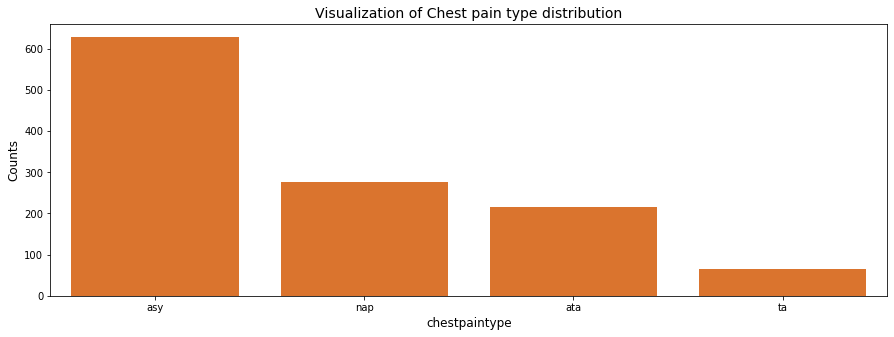

In [19]:
## CHEST PAIN TYPE


plt.figure(figsize = [15,5])
order = df['chest pain type'].value_counts().index
sns.countplot(data = df, x = 'chest pain type', order = order, color = '#F76E11');
plt.xlabel("chestpaintype", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Visualization of Chest pain type distribution", size = 14);

##more than 50 percent of the patient didnt have the asymptomatic

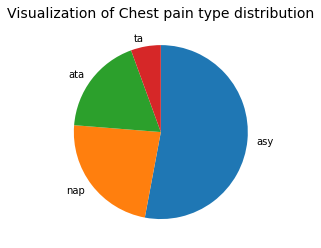

In [20]:
ChestPainType = df['chest pain type'].value_counts()
plt.pie(ChestPainType ,labels = ChestPainType.index, startangle = 90,counterclock = False);
plt.title("Visualization of Chest pain type distribution", size = 14);

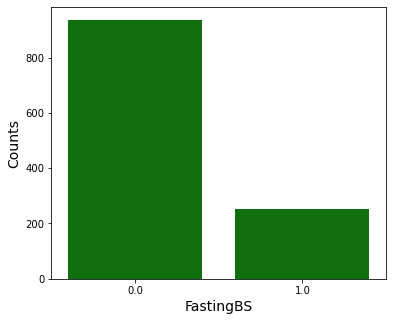

In [21]:
## FastingBP
plt.figure(figsize = [6,5])
sns.countplot(data = df , x = 'fasting blood sugar' , color = 'green')
plt.xlabel('FastingBS' , size = 14)
plt.ylabel("Counts" , size = 14)
plt.show()

## The highest percentage of patients represented in the database showed their fasting blood sugar test less than 120 ( == 0 )

Text(0.5, 0, 'Resting ECG')

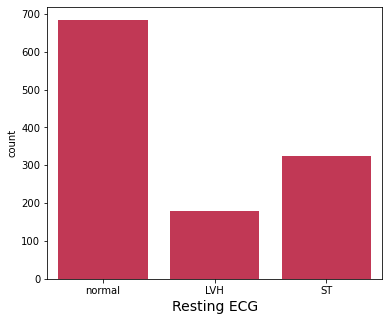

In [22]:
##Resting ECG
plt.figure(figsize = [6,5])
sns.countplot(data = df , x = 'resting ecg' , color = '#D82148')
plt.xlabel("Resting ECG" , size = 14)

## most of the people have resting ECG normal.

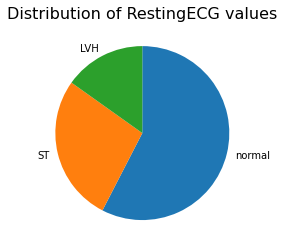

In [23]:
##Resting ECG piechart
RestingECG = df['resting ecg'].value_counts()
plt.pie(RestingECG ,labels = RestingECG.index, startangle = 90,counterclock = False)
plt.title("Distribution of RestingECG values", size = 16);

## we can infer from this plot tha more than 50 percent of people of the database their RestingECG is normal.

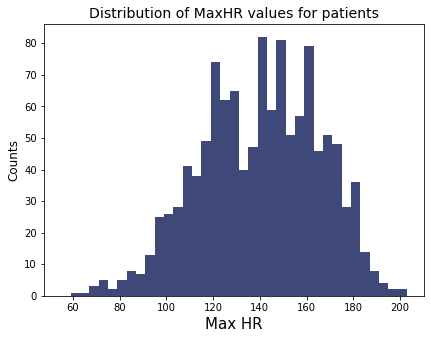

In [24]:
# MaxHR :

plt.figure(figsize = [15 , 5]);
plt.subplot(1,2,1);
bins = np.arange(55,202+4,4)
plt.hist(data = df , x = 'max heart rate' , color = '#3E497A' , bins = bins)
plt.xlabel("Max HR", size = 15);
plt.ylabel("Counts", size = 12);
plt.title("Distribution of MaxHR values for patients", size = 14);

In [25]:
df['max heart rate'].describe()

## here we can see the mean is nearly 140 and the distribution slightly left skewed

count    1188.000000
mean      139.726431
std        25.534292
min        60.000000
25%       121.000000
50%       140.500000
75%       160.000000
max       202.000000
Name: max heart rate, dtype: float64

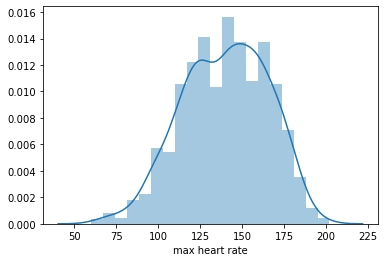

In [26]:
## making the boxplot for the MAX HR
x = df['max heart rate']
ax = sns.distplot(x)

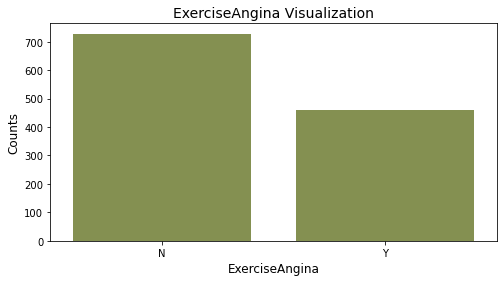

In [27]:
# ExerciseAngina :

plt.figure(figsize = [8,4]);
sns.countplot( data = df, x = 'exercise angina', color = '#8B9A46');
plt.xlabel("ExerciseAngina", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("ExerciseAngina Visualization", size = 14);

## most of the patients didnt have agnia due to excercise

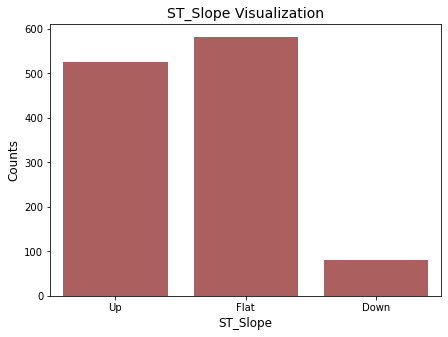

In [28]:
# ST SLOPE:

plt.figure(figsize = [7,5]);
sns.countplot( data = df, x = 'ST slope', color = '#B85252');
plt.xlabel("ST_Slope", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("ST_Slope Visualization", size = 14);

## the lowest percentage of people have 'DOWN' slope

In [29]:
df['ST slope'].value_counts()

Flat    582
Up      526
Down     80
Name: ST slope, dtype: int64

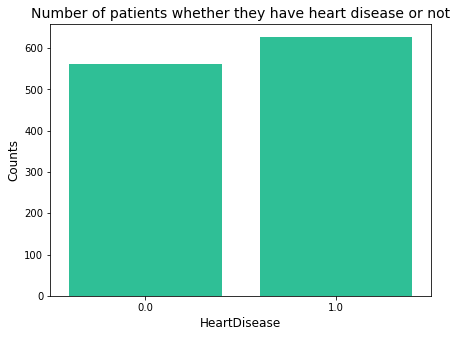

In [30]:
# HeartDisease :

plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
sns.countplot( data = df, x = 'target', color = '#17D7A0')
plt.xlabel("HeartDisease", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Number of patients whether they have heart disease or not", size = 14);

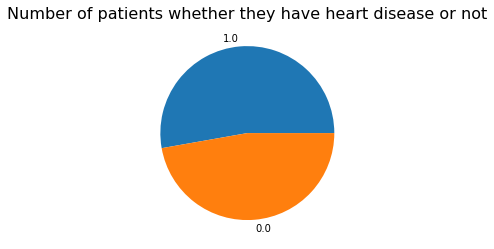

In [31]:
## making piechart for the above observation

heartDisease = df['target'].value_counts()
plt.pie(heartDisease, labels = heartDisease.index);
plt.title("Number of patients whether they have heart disease or not", size = 16);

In [32]:
df['target'].value_counts()

1.0    627
0.0    561
Name: target, dtype: int64

In [33]:
df.query("target == 1").shape[0] / df.shape[0]

## 53% of patients have heart disease

0.526890756302521

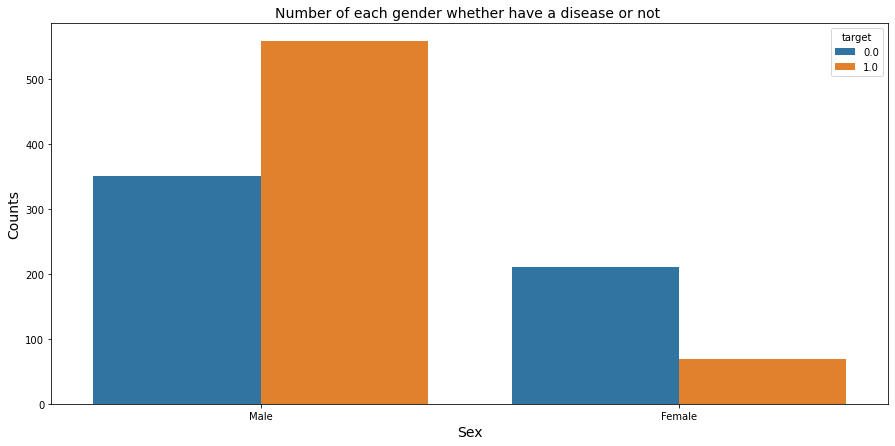

In [34]:
## SEX VS HEART DISEASE

plt.figure(figsize = [15 , 7])
sns.countplot(data = df , x = 'sex' , hue = 'target')
plt.xlabel('Sex' , size = 14)
plt.ylabel('Counts' , size = 14)
plt.title ("Number of each gender whether have a disease or not ", size = 14);


### CONCLUSIONS
## 1. Numeber of males who have heart disease is more than those haven't
## 2. Number of females who have heart disease is less than those haven't

Text(0.5, 1.0, 'Number of each gender whether they have a a heart disease or not')

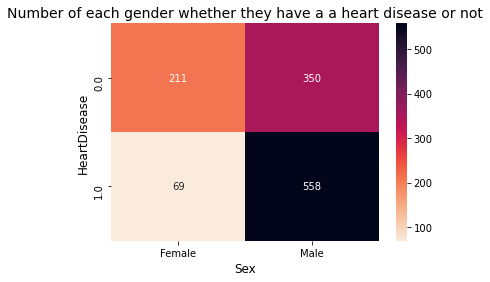

In [35]:
gender_dis = df.groupby(['sex' , 'target']).size()
gender_dis = gender_dis.reset_index(name = 'count')
gender_dis = gender_dis.pivot(index = 'target', columns = 'sex', values = 'count')
sns.heatmap(gender_dis , annot = True , fmt = 'd' , cmap = 'rocket_r')
plt.xlabel ('Sex' , size = 12)
plt.ylabel ('HeartDisease' , size = 12)
plt.title("Number of each gender whether they have a a heart disease or not" , size  = 14)

Text(0, 0.5, 'Counts')

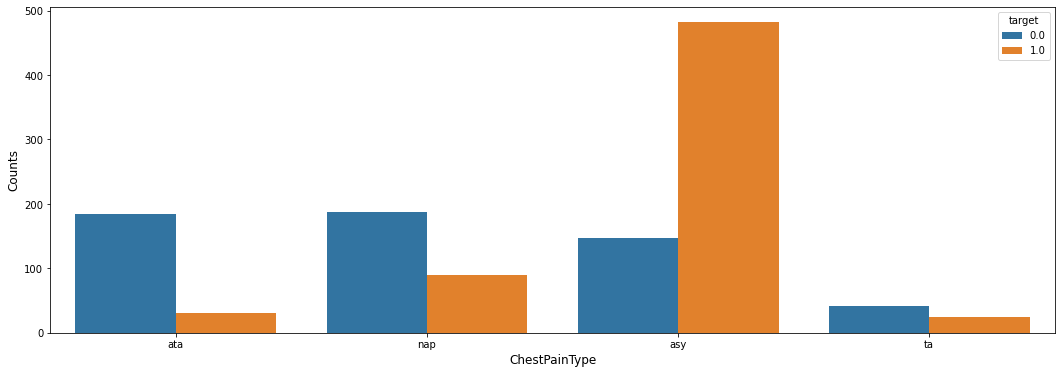

In [36]:
## CHESTPAINTYPE VS HEARTDISEASE

plt.figure(figsize = [18 , 6])
sns.countplot(data = df , x = 'chest pain type' , hue = 'target')
plt.xlabel('ChestPainType' , size = 12)
plt.ylabel('Counts' , size = 12)

## CONCLUSIONS
## for each type of chest pain we can see that the number of people who have heart disease are less than who havn't, 
## except for people who Asymptomatic, here we can see the opposite !!! (people who havn't any pain "ASY" much of them have heart disease)

Text(0.5, 1.0, 'Number of patients whther they have disease or not')

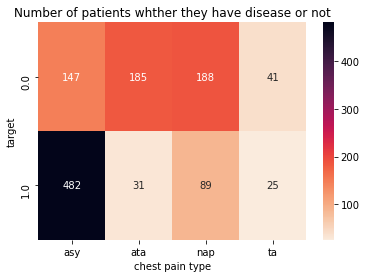

In [37]:
## making the heatmap for the above observation

pain_dis = df.groupby(['chest pain type' , 'target']).size()
pain_dis = pain_dis.reset_index(name = 'count')
pain_dis = pain_dis.pivot(index = 'target' , columns = 'chest pain type' , values = 'count')
sns.heatmap(pain_dis , annot = True , fmt = 'd' , cmap = 'rocket_r')
plt.title("Number of patients whther they have disease or not")

Text(0.5, 1.0, 'Fasting blood sugar test result V.S Heart disease')

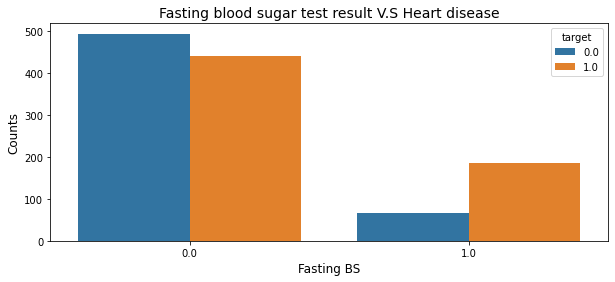

In [38]:
## FASTINGBS VS HEART DISEASE

plt.figure(figsize = [10,4])
sns.countplot(data = df , x = 'fasting blood sugar' , hue = 'target')
plt.xlabel('Fasting BS' , size = 12)
plt.ylabel('Counts' , size = 12)
plt.title("Fasting blood sugar test result V.S Heart disease", size = 14)

## People who showed positive fasting blood sugar test (result greater than 120 mg/dl) are more likely to have heart disease, although the number of people who have heart disease (whose test result = 0) is more than who haven't

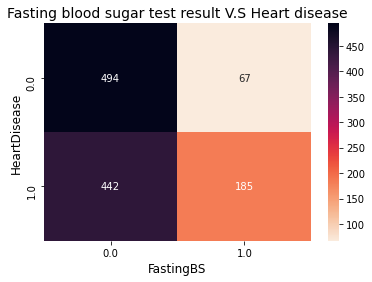

In [39]:
## making a heatmap for the above distribution

fasting_dis = df.groupby(['fasting blood sugar','target']).size()
fasting_dis = fasting_dis.reset_index(name = 'count')
fasting_dis = fasting_dis.pivot(index = 'target', columns = 'fasting blood sugar', values = 'count')
sns.heatmap(fasting_dis, annot = True, fmt = 'd',cmap = 'rocket_r');
plt.xlabel("FastingBS", size = 12);
plt.ylabel("HeartDisease", size = 12);
plt.title ("Fasting blood sugar test result V.S Heart disease", size = 14);

Text(0.5, 1.0, 'Resting ECG test result V.S Heart disease')

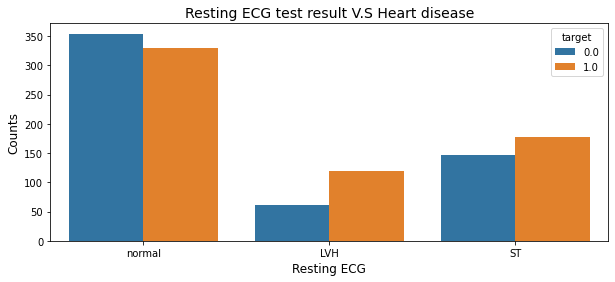

In [40]:
## RESTING ECG VS HEART DISEASE

plt.figure(figsize = [10,4])
sns.countplot(data = df , x = 'resting ecg' , hue = 'target')
plt.xlabel('Resting ECG' , size = 12)
plt.ylabel('Counts' , size = 12)
plt.title("Resting ECG test result V.S Heart disease", size = 14)

## 1. for the 'normal' ECG people having heart disease is less than those who haven't.
## 2. for the 'LVH' ECG people having heart disease is more than those who haven't.
## 3. for the 'ST' ECG people having heart disease is more than those who haven't.

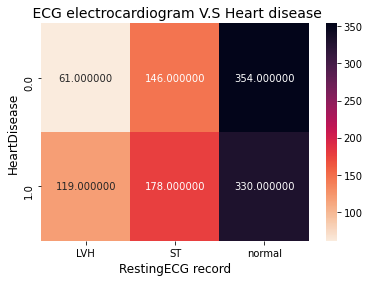

In [41]:
## making heatmap for the above observation

ecg_dis = df.groupby(['resting ecg','target']).size()
ecg_dis = ecg_dis.reset_index(name = 'count')
ecg_dis = ecg_dis.pivot(index = 'target', columns = 'resting ecg', values = 'count')
sns.heatmap(ecg_dis, annot = True, fmt = 'f', cmap = 'rocket_r');
plt.xlabel("RestingECG record", size = 12);
plt.ylabel("HeartDisease", size = 12);
plt.title (" ECG electrocardiogram V.S Heart disease", size = 14);

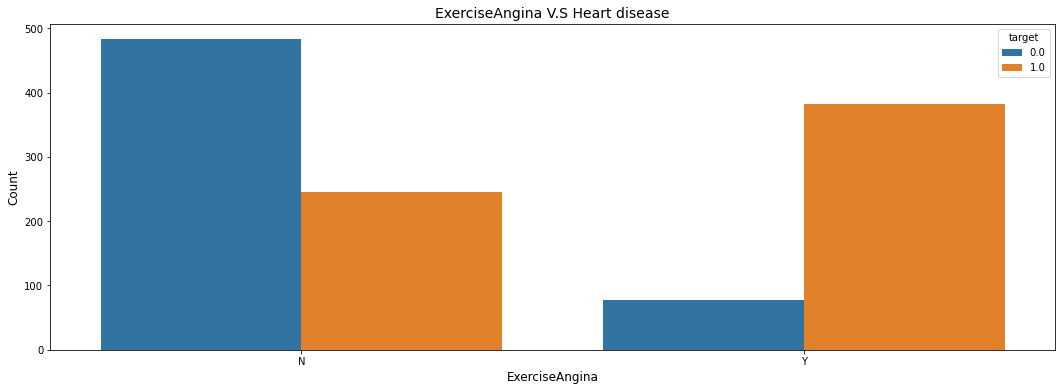

In [42]:
# ExerciseAngina vs HeartDisease :

plt.figure(figsize = [18,6]);
sns.countplot(data = df, x = 'exercise angina', hue = 'target');
plt.xlabel("ExerciseAngina", size = 12);
plt.ylabel("Count", size = 12);
plt.title ("ExerciseAngina V.S Heart disease", size = 14);

## people who have excercised induced-agina more likely to have heart disease

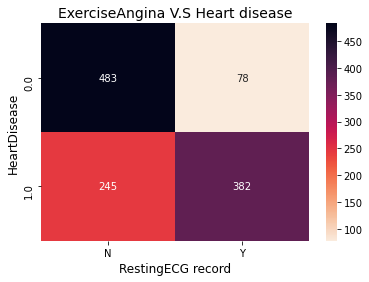

In [43]:
angina_dis = df.groupby(['exercise angina','target']).size()
angina_dis = angina_dis.reset_index(name = 'count')
angina_dis = angina_dis.pivot(index = 'target', columns = 'exercise angina', values = 'count')
sns.heatmap(angina_dis, annot = True, fmt = 'd',cmap = 'rocket_r');
plt.xlabel("RestingECG record", size = 12);
plt.ylabel("HeartDisease", size = 12);
plt.title ("ExerciseAngina V.S Heart disease", size = 14);